In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
from IPython.display import HTML
from IPython.display import display
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns

from scipy.optimize import curve_fit
os.chdir("..")
os.getcwd()

'/home/tmuehlenstaedt/ds_experiments/ds_experiments/training_dataset_size_per_class'

In [2]:
os.getcwd()

'/home/tmuehlenstaedt/ds_experiments/ds_experiments/training_dataset_size_per_class'

### Purpose of this notebook: 

### Visualize training dataset size data.

### Analyze full trainings:

In [3]:
results = pd.read_csv("csv_files/Cifar10_acc_full_train_10_iterations_20230714.csv")
results.head(2)

,itterations,accs,epoch,train_loss,val_loss
0,0,39.09,0,254.960692,33.214724
1,0,61.42,5,114.581980,21.835759


In [4]:
iterations = results.itterations.unique().tolist()
iterations

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

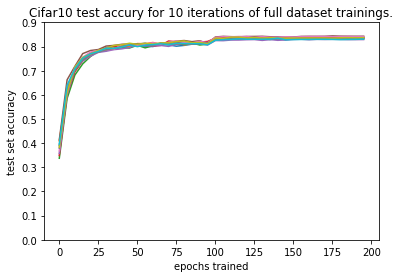

In [5]:
for it in iterations:
    mask = results.itterations == it
    plt.plot(results[mask].epoch, results[mask].accs / 100, label=it)
    plt.ylim((0, 0.9))

plt.xlabel("epochs trained")
plt.ylabel("test set accuracy")
plt.title("Cifar10 test accury for 10 iterations of full dataset trainings.")
plt.savefig("paper/plots/Cifar10_full_dataset_acc_vs_epoch.jpg")
plt.show()


### Analyze different subset sizes:

In [6]:
#results = pd.read_csv("Cifar10_acc_subsets_thomas_batch_size_512_mixture_design_20230628.csv")
results = pd.read_csv("csv_files/Cifar10_acc_subsets_thomas_batch_size_512_mixture_design_maximin_subsetsize_45000_20230705.csv")
print(results.shape)
results.head(2)

(10800, 13)


,accs,training_times,plane,car,bird,cat,deer,dog,frog,horse,ship,truck,epochs_trained
0,0.1006,0.868126,145.0,31.0,97.0,496.0,1096.0,307.0,2382.0,9.0,373.0,63.0,0
1,0.1314,4.390345,145.0,31.0,97.0,496.0,1096.0,307.0,2382.0,9.0,373.0,63.0,5


In [7]:
results["row_no"] = results.reset_index().index
#results["exp_no"] = np.floor(results.row_no % 40)
results["exp_no"] = np.floor(results.row_no / 40)
results["n_train"] = np.round(results[["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]].sum(axis=1), -1)
results.head(2)


,accs,training_times,plane,car,bird,cat,deer,dog,frog,horse,ship,truck,epochs_trained,row_no,exp_no,n_train
0,0.1006,0.868126,145.0,31.0,97.0,496.0,1096.0,307.0,2382.0,9.0,373.0,63.0,0,0,0.0,5000.0
1,0.1314,4.390345,145.0,31.0,97.0,496.0,1096.0,307.0,2382.0,9.0,373.0,63.0,5,1,0.0,5000.0


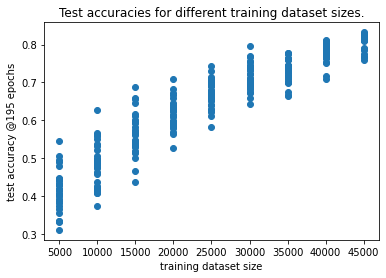

In [8]:
# visualize the test accs for the latest epoch:
mask = results.epochs_trained == 195
plt.scatter(results[mask].n_train, results[mask].accs)
plt.xlabel("training dataset size")
plt.ylabel("test accuracy @195 epochs")
plt.title("Test accuracies for different training dataset sizes.")
plt.savefig("paper/plots/Cifar10_training_datasetsize_vs_test_acc.jpg")
plt.show()


1080


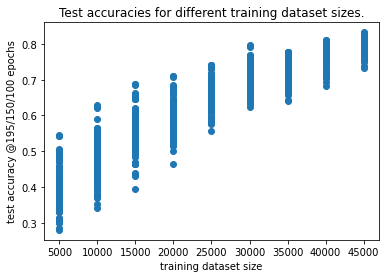

In [12]:
# visualize the test accs for the latest epoch:
mask = (results.epochs_trained == 195) | (results.epochs_trained == 150) | (results.epochs_trained == 100) | (results.epochs_trained == 50)
print(mask.sum())
plt.scatter(results[mask].n_train, results[mask].accs)
plt.xlabel("training dataset size")
plt.ylabel("test accuracy @195/150/100 epochs")
plt.title("Test accuracies for different training dataset sizes.")
plt.savefig("paper/plots/Cifar10_training_datasetsize_vs_test_acc_different_epochs.jpg")
plt.show()

In [ ]:
n_trains = results.n_train.unique().tolist()
n_trains
exp_nos = results.exp_no.unique().tolist()
n_train = n_trains[0]
#exp_no = exp_nos[0]
#results[mask]

for n_train in n_trains:
    for exp_no in exp_nos: 
        mask = (results.n_train == n_train) & (results.exp_no == exp_no)
        plt.plot(results[mask].epochs_trained, results[mask].accs, label=exp_no)
    plt.title(f"subset size = {int(n_train)}")
    plt.ylim((0, 0.9))
    plt.xlabel("epoch")
    plt.ylabel("test accuracy")
    plt.savefig(f"paper/plots/test_acc_vs_epoch_subset_size_{int(n_train)}.jpg")
    plt.show()


In [ ]:
# Visualize all data in one plot:
results.head(2)
plt.figure(figsize=(15,10))
sns.scatterplot(data=results, x="epochs_trained", y="accs", hue="n_train")
plt.show()


In [ ]:
# visualize the designs:
results.head(2)


In [ ]:
results.n_train.unique()
mask = results.n_train == 5000
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
doe = results[mask][classes].drop_duplicates().reset_index(drop=True)
sns.pairplot(doe)
plt.show()

In [ ]:
results.n_train.unique()
mask = results.n_train == 45000
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
doe = results[mask][classes].drop_duplicates().reset_index(drop=True)
sns.pairplot(doe)
plt.show()